In [1]:
import numpy as np
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [12]:
TRAINING_DIR = r'C:\Users\Andri\Documents\Machine Learning\Bangkit\Self Learning\Hummingbirds\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = r'C:\Users\Andri\Documents\Machine Learning\Bangkit\Self Learning\Hummingbirds\valid'
validation_datagen = ImageDataGenerator(rescale = 1./255)

TEST_DIR = r'C:\Users\Andri\Documents\Machine Learning\Bangkit\Self Learning\Hummingbirds\test'
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=50
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=50
)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                        target_size=(150,150),
                        batch_size=50,
                        class_mode='categorical')


Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The Third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [10]:
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator,validation_data = validation_generator,epochs = 100,verbose = 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

Epoch 47/100
8/8 [==============================] - 3s 326ms/step - loss: 0.3209 - accuracy: 0.8826 - val_loss: 0.4664 - val_accuracy: 0.8875
Epoch 48/100
8/8 [==============================] - 3s 326ms/step - loss: 0.3608 - accuracy: 0.8660 - val_loss: 0.4559 - val_accuracy: 0.8500
Epoch 49/100
8/8 [==============================] - 3s 331ms/step - loss: 0.4447 - accuracy: 0.8086 - val_loss: 0.4678 - val_accuracy: 0.8625
Epoch 50/100
8/8 [==============================] - 3s 348ms/step - loss: 0.4032 - accuracy: 0.8486 - val_loss: 0.5344 - val_accuracy: 0.8500
Epoch 51/100
8/8 [==============================] - 3s 328ms/step - loss: 0.3486 - accuracy: 0.8741 - val_loss: 0.6136 - val_accuracy: 0.8500
Epoch 52/100
8/8 [==============================] - 3s 336ms/step - loss: 0.2919 - accuracy: 0.8975 - val_loss: 0.4561 - val_accuracy: 0.9250
Epoch 53/100
8/8 [==============================] - 3s 325ms/step - loss: 0.3303 - accuracy: 0.8757 - val_loss: 0.5572 - val_accuracy: 0.8750
Epoch 

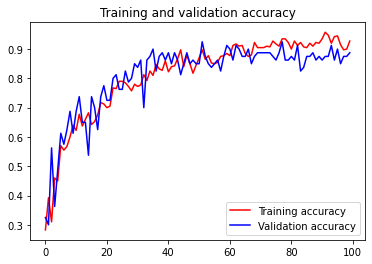

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [14]:
# Evaluate against test data.
scores = model.evaluate(test_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2/2 [==============================] - 0s 41ms/step - loss: 0.3779 - accuracy: 0.8875
Test loss: 0.3778582811355591
Test accuracy: 0.887499988079071


In [16]:
#saving the model
model.save("hummingbird.h5")
